# loading data set 

In [30]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np

In [31]:
import pandas as pd
data = pd.read_csv('LANDINGS OF METEORITE - Meteorite-Landings.csv')
data.head()

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2828 non-null   object 
 1   nametype     2828 non-null   object 
 2   recclass     2828 non-null   object 
 3   mass (g)     2797 non-null   float64
 4   fall         2828 non-null   object 
 5   year         2821 non-null   object 
 6   reclat       2782 non-null   float64
 7   reclong      2782 non-null   float64
 8   GeoLocation  2782 non-null   object 
dtypes: float64(3), object(6)
memory usage: 199.0+ KB


# label encoding 

In [33]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data["fall"] = label.fit_transform(data["fall"])

In [34]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['mass (g)', 'year','fall', 'reclat', 'reclong']
data = data[features].dropna()

# Convert 'year' to datetime and extract year only
data['year'] = pd.to_datetime(data['year'], errors='coerce').dt.year
data = data.dropna()

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


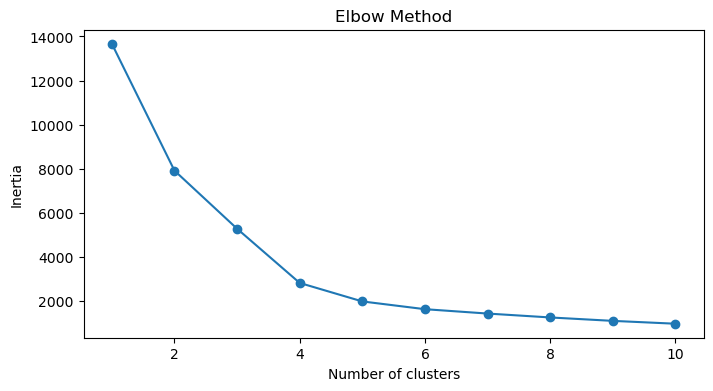

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


Silhouette Score: 0.65


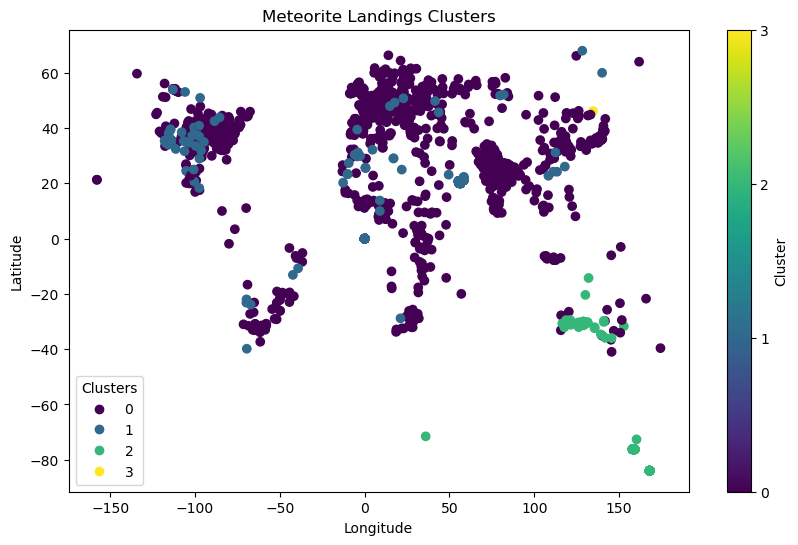

In [36]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
score = silhouette_score(scaled_data, data['Cluster'])
print(f'Silhouette Score: {score:.2f}')

# Visualize the clusters (2D example with latitude and longitude)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['reclong'], data['reclat'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Landings Clusters')
plt.colorbar(label='Cluster', ticks=[0, 1, 2, 3])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [37]:
data["Cluster"].value_counts()

0    1005
2     932
1     796
3       1
Name: Cluster, dtype: int64

# apply some plots to understand the data 

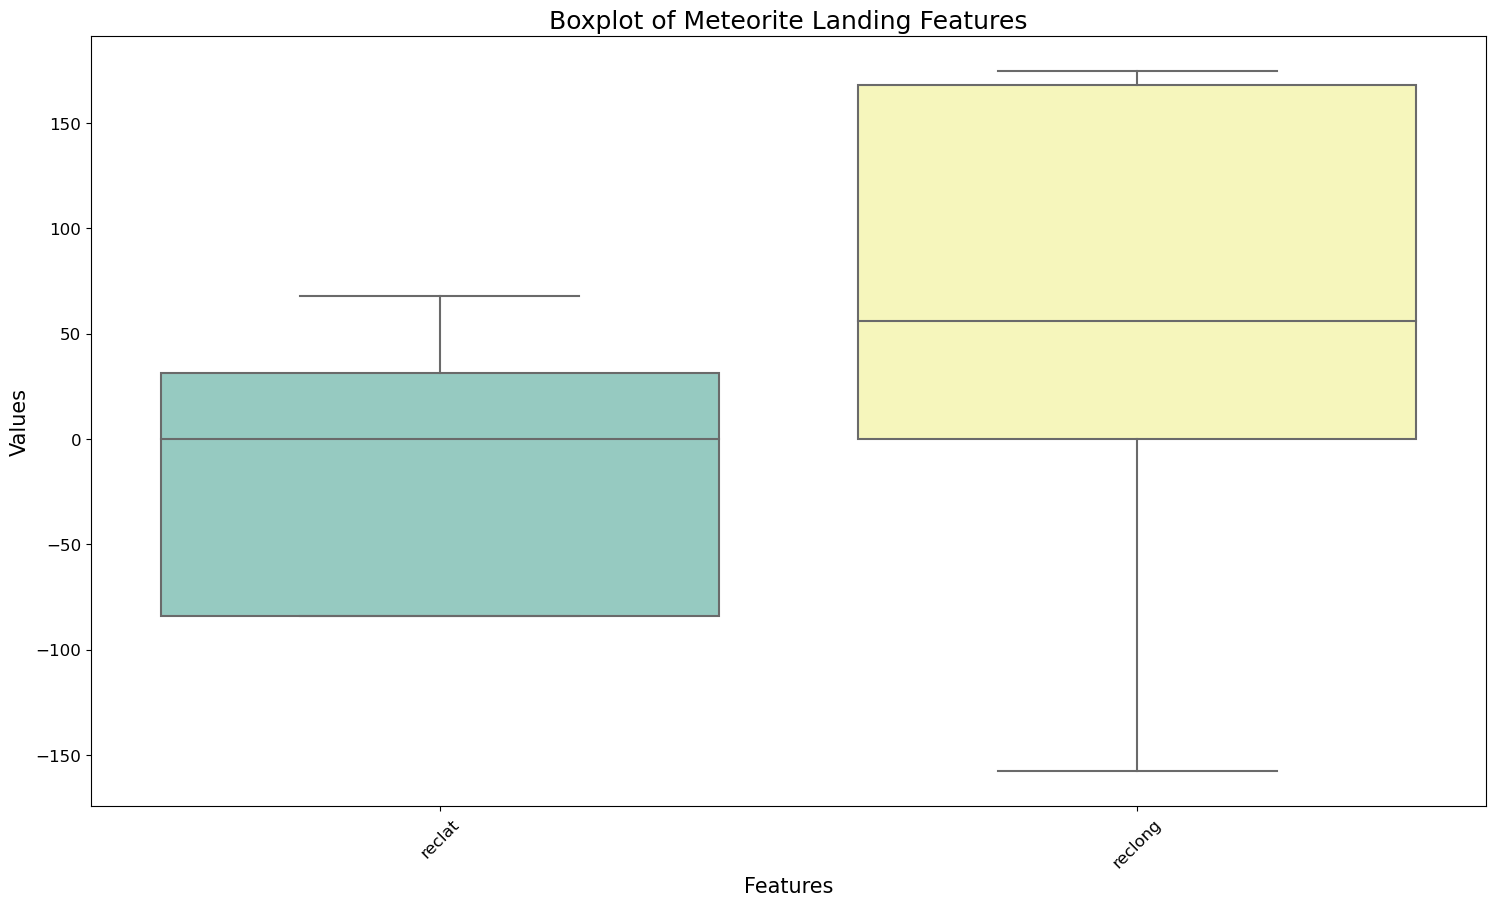

In [44]:
import seaborn as sns
features = [ 'reclat', 'reclong']

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create a box plot with seaborn
sns.boxplot(data=data[features], palette="Set3")

# Customize the plot
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.title('Boxplot of Meteorite Landing Features', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

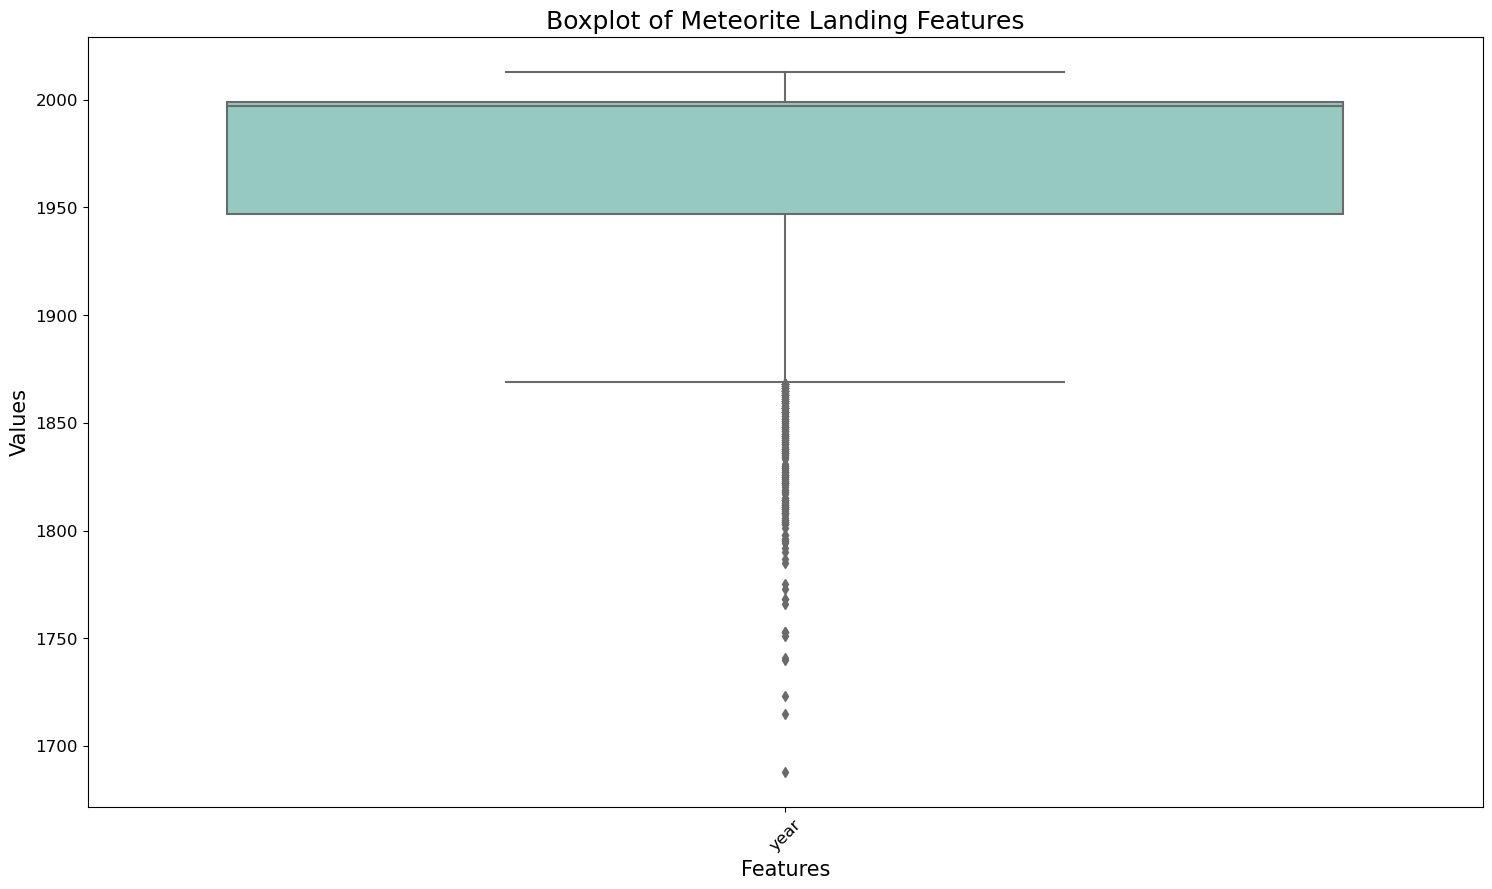

In [10]:
import seaborn as sns
features = [ 'year']

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create a box plot with seaborn
sns.boxplot(data=data[features], palette="Set3")

# Customize the plot
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.title('Boxplot of Meteorite Landing Features', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

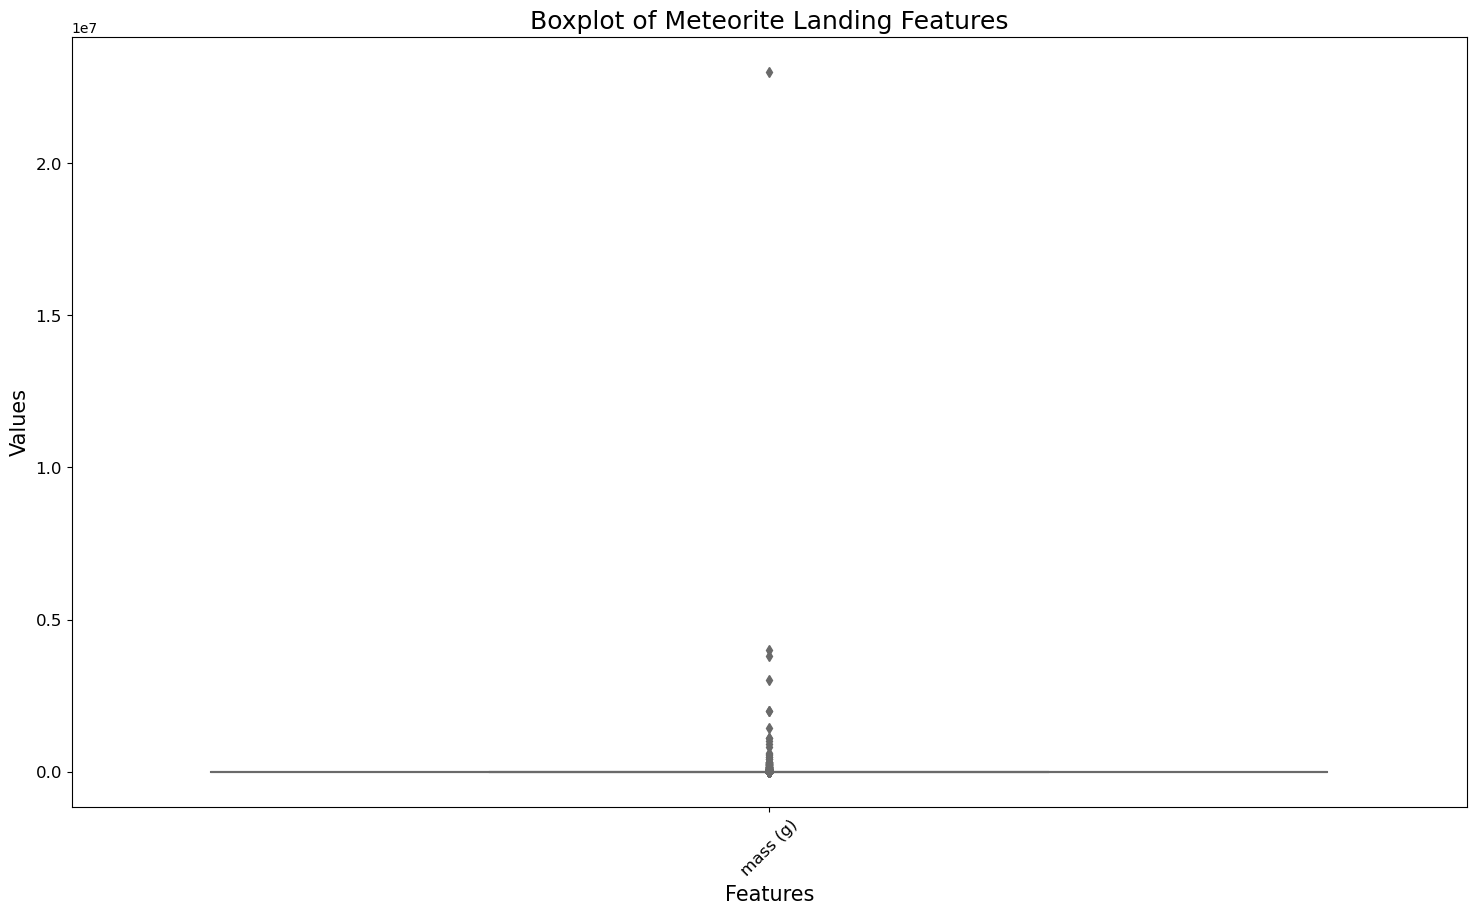

In [11]:
import seaborn as sns
features = ['mass (g)']

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create a box plot with seaborn
sns.boxplot(data=data[features], palette="Set3")

# Customize the plot
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.title('Boxplot of Meteorite Landing Features', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

# sampling the data 

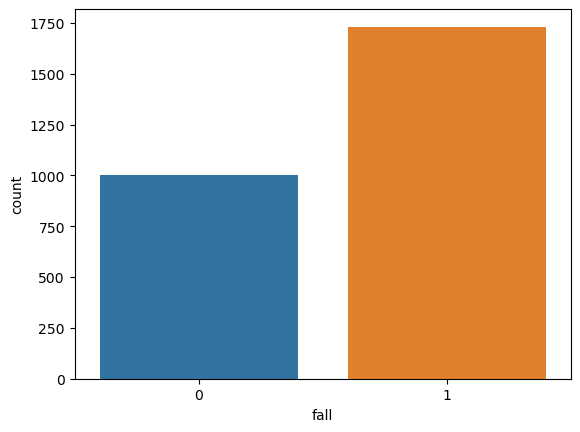

In [12]:
sns.countplot(x=data["fall"])
plt.show()

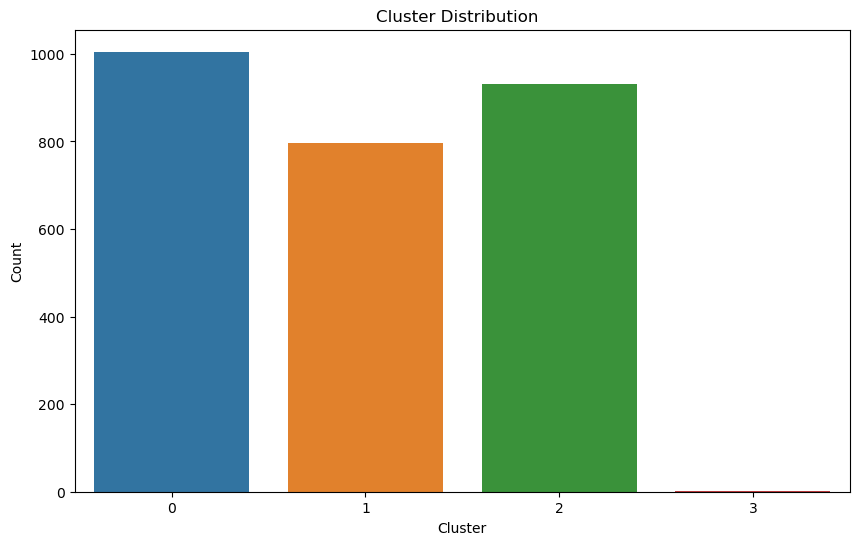

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution  ')
plt.show()

# Additional analysis and visualization as needed


In [14]:
'''#Calculate 25% of the total dataset size
total_size = len(data)
target_size = total_size // 4  # Integer division for equal distribution
print(f'Target size for each cluster: {target_size}')
from sklearn.utils import resample 

#Separate the data by clusters
clusters= [data[data['Cluster'] == i] for i in range(4)]

#Adjust the size of each cluster
adjusted_clusters = []
for cluster in clusters:
    if len(cluster) < target_size:
        # Oversample
        adjusted_cluster = resample(cluster, replace=True, n_samples=target_size, random_state=42)
    else:
        # Undersample
        adjusted_cluster = resample(cluster, replace=True, n_samples=target_size, random_state=42)
    adjusted_clusters.append(adjusted_cluster)

#Combine the adjusted data
final_data = pd.concat(adjusted_clusters)'''

"#Calculate 25% of the total dataset size\ntotal_size = len(data)\ntarget_size = total_size // 4  # Integer division for equal distribution\nprint(f'Target size for each cluster: {target_size}')\nfrom sklearn.utils import resample \n\n#Separate the data by clusters\nclusters= [data[data['Cluster'] == i] for i in range(4)]\n\n#Adjust the size of each cluster\nadjusted_clusters = []\nfor cluster in clusters:\n    if len(cluster) < target_size:\n        # Oversample\n        adjusted_cluster = resample(cluster, replace=True, n_samples=target_size, random_state=42)\n    else:\n        # Undersample\n        adjusted_cluster = resample(cluster, replace=True, n_samples=target_size, random_state=42)\n    adjusted_clusters.append(adjusted_cluster)\n\n#Combine the adjusted data\nfinal_data = pd.concat(adjusted_clusters)"

In [15]:
#using hold-out method
x = data.drop("Cluster", axis=1).values
y = data["Cluster"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

# building the models 

In [16]:
def evaluate(model):
    print(f'accuracy on test: {model.score(x_test, y_test)}')
    
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'\n\n{cm}')
    print(f'\n\n{classification_report(y_test, y_pred)}')
    
    
    print("---------------------------------------------------------")


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [18]:
#Decision Tree classifier
dt = DecisionTreeClassifier(random_state=5)
dt.fit(x_train, y_train)
print("Decision Tree:\n")
evaluate(dt)

Decision Tree:

accuracy on test: 0.9963459196102314


[[305   1   0]
 [  0 224   0]
 [  1   1 289]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       0.99      1.00      1.00       224
           2       1.00      0.99      1.00       291

    accuracy                           1.00       821
   macro avg       1.00      1.00      1.00       821
weighted avg       1.00      1.00      1.00       821

---------------------------------------------------------


In [19]:
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes:\n")
evaluate(nb)

Naive Bayes:

accuracy on test: 0.9123020706455542


[[249  56   1]
 [ 11 212   1]
 [  2   1 288]]


              precision    recall  f1-score   support

           0       0.95      0.81      0.88       306
           1       0.79      0.95      0.86       224
           2       0.99      0.99      0.99       291

    accuracy                           0.91       821
   macro avg       0.91      0.92      0.91       821
weighted avg       0.92      0.91      0.91       821

---------------------------------------------------------


In [20]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train, y_train)

print("KNN:\n")
evaluate(knn)

KNN:

accuracy on test: 0.9098660170523751


[[275  30   1]
 [ 31 193   0]
 [  9   3 279]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       306
           1       0.85      0.86      0.86       224
           2       1.00      0.96      0.98       291

    accuracy                           0.91       821
   macro avg       0.91      0.91      0.91       821
weighted avg       0.91      0.91      0.91       821

---------------------------------------------------------


In [21]:
logistic = LogisticRegression(C=0.1, max_iter=500)
logistic.fit(x_train,y_train)

print("Logistic regression:\n")
evaluate(logistic)

Logistic regression:

accuracy on test: 0.8063337393422655


[[250  54   2]
 [101 123   0]
 [  0   2 289]]


              precision    recall  f1-score   support

           0       0.71      0.82      0.76       306
           1       0.69      0.55      0.61       224
           2       0.99      0.99      0.99       291

    accuracy                           0.81       821
   macro avg       0.80      0.79      0.79       821
weighted avg       0.80      0.81      0.80       821

---------------------------------------------------------


In [22]:
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=5)
bc.fit(x_train, y_train)
print("Bagging:\n")
evaluate(bc)

Bagging:

accuracy on test: 0.9963459196102314


[[306   0   0]
 [  0 223   1]
 [  1   1 289]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       224
           2       1.00      0.99      0.99       291

    accuracy                           1.00       821
   macro avg       1.00      1.00      1.00       821
weighted avg       1.00      1.00      1.00       821

---------------------------------------------------------


In [23]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=70)
ada.fit(x_train, y_train)

print("AdaBoost:\n")
evaluate(ada)

AdaBoost:

accuracy on test: 0.9963459196102314


[[305   1   0]
 [  0 224   0]
 [  1   1 289]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       0.99      1.00      1.00       224
           2       1.00      0.99      1.00       291

    accuracy                           1.00       821
   macro avg       1.00      1.00      1.00       821
weighted avg       1.00      1.00      1.00       821

---------------------------------------------------------


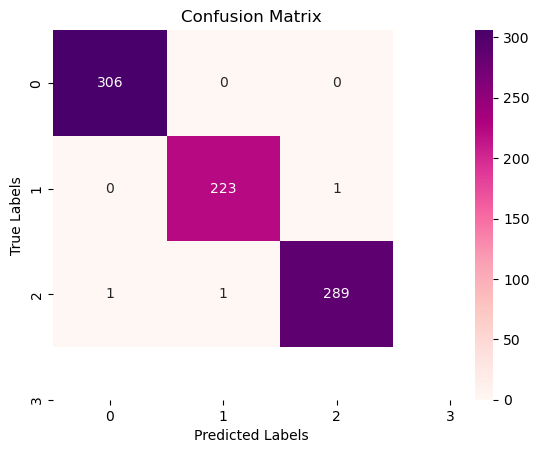

In [24]:
y_pred = bc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

labels = np.unique(y)
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# roc curve 

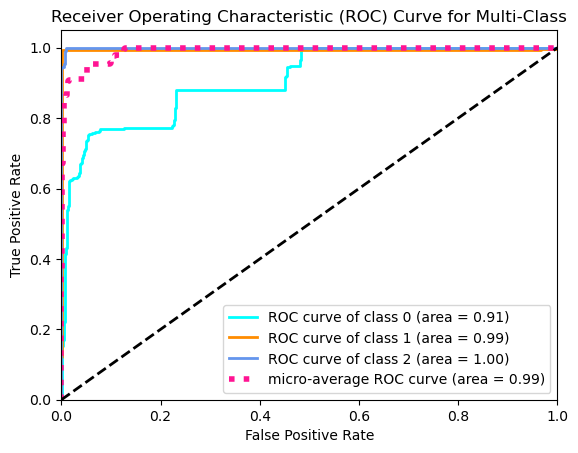

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

X= data.drop("Cluster", axis=1).values
y = data["Cluster"]

# Binarize the output (one-vs-all)
y = label_binarize(y, classes=[0, 1, 2,3])
n_classes = y.shape[1]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit the model
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Convert y_test and y_score to numpy arrays if they aren't already
y_test = np.array(y_test)
y_score = np.array(y_score)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()


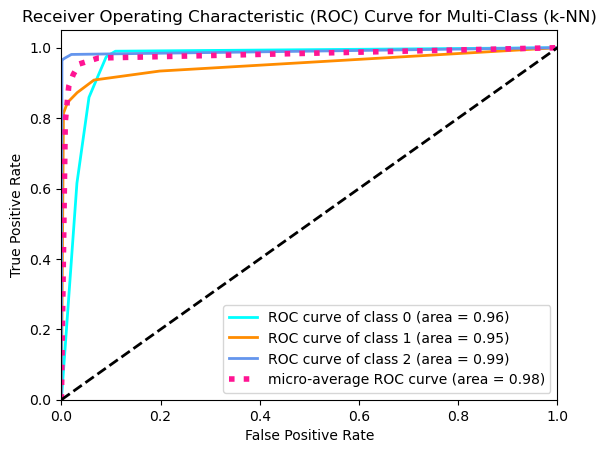

In [26]:
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

X= data.drop("Cluster", axis=1).values
y = data["Cluster"]

# Binarize the output (one-vs-all)
y = label_binarize(y, classes=[0, 1, 2,3])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the One-vs-Rest classifier with k-Nearest Neighbors
classifier = OneVsRestClassifier(KNeighborsClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Convert y_test and y_score to numpy arrays if they aren't already
y_test = np.array(y_test)
y_score = np.array(y_score)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class (k-NN)')
plt.legend(loc="lower right")
plt.show()


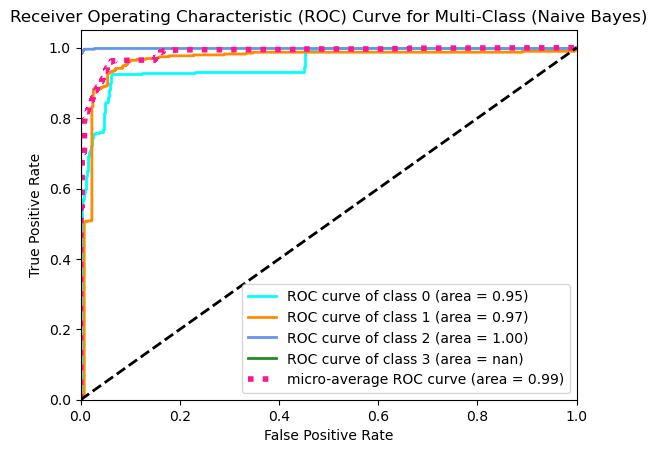

In [27]:
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Assuming final_data is your DataFrame
X = data.drop("Cluster", axis=1).values
y = data["Cluster"]

# Binarize the output (one-vs-all)
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the One-vs-Rest classifier with Gaussian Naive Bayes
classifier = OneVsRestClassifier(GaussianNB())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'forestgreen']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()


# cross validation

In [28]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
x = data.drop("Cluster", axis=1).values
y =data["Cluster"]
model = DecisionTreeRegressor()
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
acc_scores = -scores
mean_acc =- acc_scores.mean()
print("acc avg:", mean_acc)
x = data.drop("Cluster", axis=1).values
y = data["Cluster"]
model = GaussianNB()
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
acc_scores = -scores
mean_acc =- acc_scores.mean()
print("acc avg:", mean_acc)
x = data.drop("Cluster", axis=1).values
y = data["Cluster"]
model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
acc_scores = -scores
mean_acc =- acc_scores.mean()
print("acc avg:", mean_acc)
x = data.drop("Cluster", axis=1).values
y = data["Cluster"]
model = BaggingClassifier()
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
acc_scores = -scores
mean_acc =- acc_scores.mean()
print("acc avg:", mean_acc)
x = data.drop("Cluster", axis=1).values
y = data["Cluster"]
model = AdaBoostClassifier()
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
acc_scores = -scores
mean_acc =- acc_scores.mean()
print("acc avg:", mean_acc)
x = data.drop("Cluster", axis=1).values
y = data["Cluster"]
model = KNeighborsClassifier()
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
acc_scores = -scores
mean_acc =- acc_scores.mean()
print("acc avg:", mean_acc)


acc avg: 0.9934106113265162
acc avg: 0.8895159076146278
acc avg: 0.7417883761576632
acc avg: 0.9919480884745967
acc avg: 0.9348079099450214
acc avg: 0.9286531262765265
